In [7]:
import pandas as pd
import numpy as np

np.random.seed(42)

num_students = 30

data = {
  "Name": [f"Student-{i}" for i in range(1, num_students+1)],
  "Physics": np.random.randint(30, 100, size=num_students),
  "Chemistry": np.random.randint(30, 100, size=num_students),
  "Math": np.random.randint(30, 100, size=num_students),
  "English": np.random.randint(30, 100, size=num_students),
  "Percentage": np.round(np.random.rand(num_students) * 33 + 67, 2),
  "Scholarship": np.random.randint(5, 20, size=num_students)
}

df = pd.DataFrame(data)

# Add some missing values
df.loc[7:10, ["Physics", "Chemistry"]] = np.nan
df.loc[20:23, ["Math", "English"]] = np.nan
df.loc[26:28, "Percentage"] = np.nan

print(df)

          Name  Physics  Chemistry  Math  English  Percentage  Scholarship
0    Student-1     81.0       32.0  43.0     77.0       87.60            7
1    Student-2     44.0       80.0  77.0     52.0       76.76            5
2    Student-3     90.0       36.0  44.0     91.0       70.48            9
3    Student-4     50.0       50.0  91.0     66.0       82.07            5
4    Student-5     53.0       68.0  69.0     73.0       74.21           12
5    Student-6     32.0       47.0  82.0     64.0       80.74            5
6    Student-7     51.0       33.0  53.0     94.0       96.15           15
7    Student-8      NaN        NaN  55.0     76.0       77.70            5
8    Student-9      NaN        NaN  89.0     32.0       71.03            6
9   Student-10      NaN        NaN  70.0     30.0       78.76            6
10  Student-11      NaN        NaN  58.0     34.0       96.93           16
11  Student-12     31.0       31.0  44.0     43.0       75.98           10
12  Student-13     93.0  

         Physics  Chemistry       Math    English  Percentage  Scholarship
count  26.000000  26.000000  26.000000  26.000000   27.000000    30.000000
mean   70.769231  58.615385  59.461538  62.884615   80.105185     9.600000
std    20.794822  22.021947  19.904232  21.183629    7.698312     4.073463
min    31.000000  31.000000  30.000000  30.000000   67.020000     5.000000
25%    51.000000  35.250000  41.500000  43.250000   74.640000     6.000000
50%    79.000000  63.500000  57.500000  64.500000   78.630000     9.000000
75%    89.000000  78.250000  73.000000  79.250000   85.020000    12.000000
max    93.000000  92.000000  94.000000  95.000000   96.930000    18.000000
5     0.233333
9     0.100000
15    0.100000
6     0.100000
11    0.100000
7     0.066667
12    0.066667
16    0.066667
10    0.066667
18    0.033333
14    0.033333
8     0.033333
Name: Scholarship, dtype: float64


<ipython-input-4-e30255afbedc>:19: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  plt.matshow(df.corr())


             Total  Percent
Physics          4    13.33
Chemistry        4    13.33
Math             4    13.33
English          4    13.33
Percentage       3    10.00
Name             0     0.00
Scholarship      0     0.00


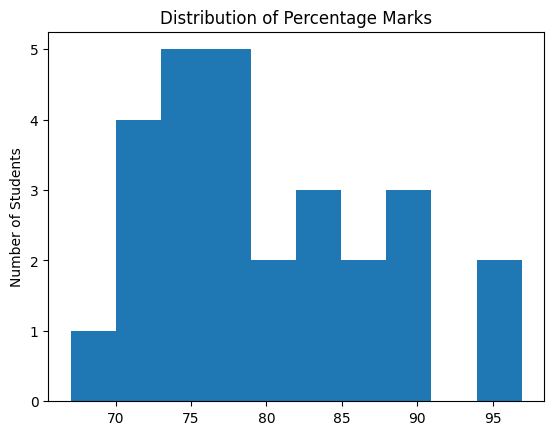

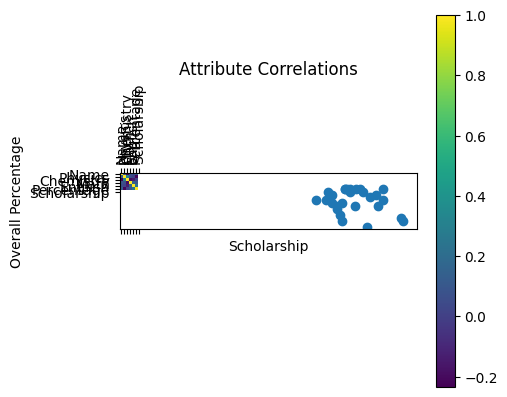

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Dataset from previous code

# Summary stats
print(df.describe())

# Overall scholarship distribution
print(df["Scholarship"].value_counts(normalize=True))

# Percentage distribution
df["Percentage"].plot.hist(bins=10)
plt.ylabel("Number of Students")
plt.title("Distribution of Percentage Marks")

# Correlation Plot
plt.matshow(df.corr())
plt.xticks(range(len(df.columns)), df.columns, rotation=90)
plt.yticks(range(len(df.columns)), df.columns)
plt.colorbar()
plt.title("Attribute Correlations")

# Scatterplot
plt.scatter(x=df["Percentage"], y=df["Scholarship"])
plt.xlabel("Scholarship")
plt.ylabel("Overall Percentage")

# Handling Null Values
total = df.isnull().sum().sort_values(ascending=False)
percent = round(df.isnull().sum()/df.isnull().count()*100, 2)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
print(missing_data)

In [8]:
# Identify missing values
print(df.isnull().sum())

# Fill continuous missing values with mean
cont_cols = ["Physics", "Chemistry", "Math", "English","Percentage"]
for col in cont_cols:
    df[col] = df[col].fillna(df[col].mean())

# Fill categorical missing with mode
cat_cols = ["Name", "Scholarship"]
for col in cat_cols:
   df[col] = df[col].fillna(df[col].mode()[0])

# Validate missing values handled
print(df.isnull().sum().sum())

Name           0
Physics        4
Chemistry      4
Math           4
English        4
Percentage     3
Scholarship    0
dtype: int64
0


             Percentage  Scholarship
Percentage     1.000000     0.214375
Scholarship    0.214375     1.000000
50-60% Range Average Scholarship: nan
60-70% Range Average Scholarship: 9.00
70-80% Range Average Scholarship: 8.64
80-90% Range Average Scholarship: 9.77


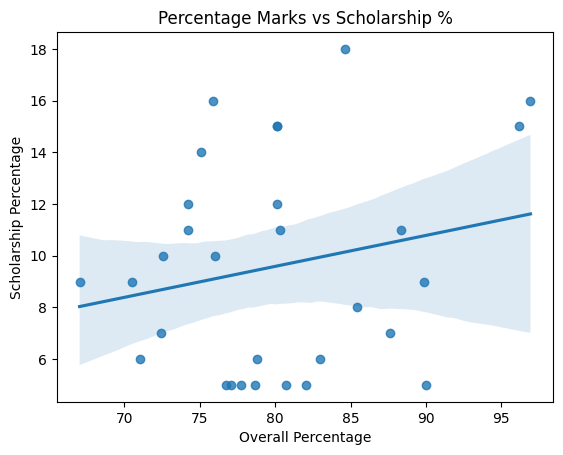

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Student DataFrame from previous code

# Scatter Plot
sns.regplot(x="Percentage", y="Scholarship", data=df)
plt.title("Percentage Marks vs Scholarship %")
plt.xlabel("Overall Percentage")
plt.ylabel("Scholarship Percentage")

# Correlation
print(df[["Percentage", "Scholarship"]].corr())

# Average Scholarship by Percentage Range
percent_ranges = [50, 60, 70, 80, 90]
for i in range(len(percent_ranges)-1):
    low = percent_ranges[i]
    high = percent_ranges[i+1]

    avg_scholarship = df[(df["Percentage"] >= low) &
                        (df["Percentage"] < high)]["Scholarship"].mean()

    print(f"{low}-{high}% Range Average Scholarship: {avg_scholarship:.2f}")

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Dataset and Features
X = df[['Percentage']]

# Target Variable
y = df['Scholarship']

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)
print("Linear Regression MAE:", mean_absolute_error(y_test, model.predict(X_test)))



Linear Regression MAE: 3.5002888791390507


In [16]:
# Random Forest Regression
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train , y_train)
print("Random Forest MAE:", mean_absolute_error(y_test, rf_model.predict(X_test)))

Random Forest MAE: 2.743333333333333


In [15]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

# Loading pretrained Random Forest model


# New examples dataset
new_data = pd.DataFrame({
    "Percentage": [73.5, 81, 59.8, 90, 56]
})

# Make predictions
predictions = model.predict(new_data)

# Print predictions
for i, perc in enumerate(new_data["Percentage"]):
    print(f"Student with {perc}% marks, " +
          f"predicted Scholarship Percentage: {predictions[i]:.2f}")

Student with 73.5% marks, predicted Scholarship Percentage: 8.82
Student with 81.0% marks, predicted Scholarship Percentage: 9.40
Student with 59.8% marks, predicted Scholarship Percentage: 7.75
Student with 90.0% marks, predicted Scholarship Percentage: 10.10
Student with 56.0% marks, predicted Scholarship Percentage: 7.46


In [17]:
# Make predictions
predictions = rf_model.predict(new_data)

# Print predictions
for i, perc in enumerate(new_data["Percentage"]):
    print(f"Student with {perc}% marks, " +
          f"predicted Scholarship Percentage: {predictions[i]:.2f}")

Student with 73.5% marks, predicted Scholarship Percentage: 10.94
Student with 81.0% marks, predicted Scholarship Percentage: 7.71
Student with 59.8% marks, predicted Scholarship Percentage: 8.86
Student with 90.0% marks, predicted Scholarship Percentage: 6.71
Student with 56.0% marks, predicted Scholarship Percentage: 8.86
